<a href="https://colab.research.google.com/github/Pranpriya04/AL_Learn/blob/main/chapter_4_2_irisANN_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

pip install keras

In [2]:
pip install tensorflow

In [3]:
from keras import Sequential
from keras.layers import Dense

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import io
from google.colab import files
uploaded = files.upload()
iris = pd.read_csv(io.BytesIO(uploaded['iris.csv']))

Saving iris.csv to iris.csv


In [5]:
iris.tail(5)

,sepallength,sepalwidth,petallength,petalwidth,class
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [6]:
#Splitting the data into Attritbute and Class
X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values # attribute 4 is label data


# Convert Class to numeric

In [7]:
from tensorflow.keras.utils import to_categorical
#-----------------------1-------------------------
from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y) # y1 is converted to numeric (0 , 1, 2)
#Y = pd.get_dummies(y1).values

In [8]:
y1

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
#-------------------------2-----------------------
# convert to (1 0 0, 0 1 0  ,0 0 1)
Y =to_categorical(y1,num_classes=3)

In [10]:
Y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

# Split Train Test

In [11]:


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0)

# Softmax
Softmax function เข้าใจง่าย ๆ ว่า Softmax รับตัวเลขเข้าไป แล้วแปลงออกมาเป็น Probability Softmax มักถูกนำไปไว้ Layer สุดท้าย ของ Neural Network เพื่อให้ Output ออกมาเป็น Probability

# ระหว่าง Softmax กับ Sigmoid ฟังก์ชั่นทั้งสองอันไหนดีกว่า
ตอบ: ขึ้นอยู๋กับคลาสงาน ถ้าเป็นงานทางด้าน multiclass classification จะนิยมใช้ Softmax แต่จริงๆ ทั้งสอง function ใช้กับงาน multiclass ได้ ขึ้นอยู่กับ architecture ของ NN ของเรา เช่น ถ้าเราต้องการแค่ค่า maximum เป้าหมายอย่างเดียวเช่นแยกภาพ หมา แมว กระต่าย softmax เป็นทางเลือกที่ง่ายกว่า แต่ถ้าต้องการคำตอบแบบเป็น ranking กรณีที่คำตอบมันอาจจะเป็นก้ำกึ่งๆระหว่างคลาสได้เช่น แยกพันธ์หมา แล้วมีพวกพันธ์ที่คล้ายกันอยู่มากเช่น พันธ์ชิบะ อาคิตะ คอร์กิ (multiclass relevance) sigmoid จะช่วยให้เราจัดอันดับแร้งค์กิ้งได้ดีกว่า

# Stochastic Gradient Descent(SGD)  
เป็นอัลกอริทึมที่อัพเดทค่าพารามิเตอร์ในทุกๆชุดข้อมูลฝึกฝน เป็นอัลกอริทึมที่ค่อนข้างไว อัพเดทแค่ครั้งเดียวต่อการเทรน 1 รอบ

In [50]:
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import SGD

classifier = Sequential()

classifier.add(Dense(10,input_shape=(4,),activation='tanh'))
classifier.add(Dense(8,activation='tanh'))
classifier.add(Dense(6,activation='tanh'))
classifier.add(Dense(3,activation='softmax'))
opt = SGD(learning_rate=0.01)
classifier.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

classifier.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 213 (852.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
# ทดลองเปลี่ยนค่า batch_size and epochs
history = classifier.fit(X_train, y_train, batch_size=15, epochs=150, validation_data=(X_test, y_test))

Epoch 1/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.3551 - loss: 1.1544 - val_accuracy: 0.4333 - val_loss: 1.0565
Epoch 2/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3248 - loss: 1.0960 - val_accuracy: 0.4333 - val_loss: 1.0483
Epoch 3/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.3584 - loss: 1.0566 - val_accuracy: 0.3333 - val_loss: 1.0385
Epoch 4/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.4821 - loss: 1.0285 - val_accuracy: 0.5000 - val_loss: 1.0215
Epoch 5/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7299 - loss: 0.9979 - val_accuracy: 0.6000 - val_loss: 1.0043
Epoch 6/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7367 - loss: 0.9838 - val_accuracy: 0.5667 - val_loss: 0.9816
Epoch 7/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6225 - loss: 0.9859 - val_accuracy: 0.5667 - val_loss: 0.9578
Epoch 8/150
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6805 - loss: 0.9362 - val_accuracy: 0.5667 - val_loss: 0.9

In [52]:
eval_model=classifier.evaluate(X_test, y_test)
eval_model


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 536ms/step - accuracy: 1.0000 - loss: 0.1490


[0.14902524650096893, 1.0]

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


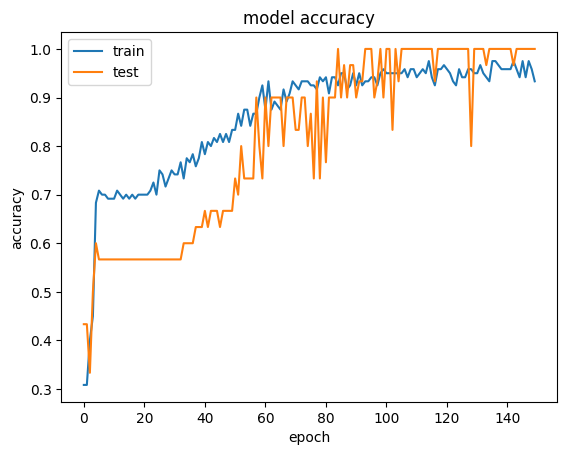

In [53]:
import matplotlib.pyplot as plt # For graphical representation
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

**นำโมเดลมาทดลองจำแนกประเภทกับชุดข้อมูลทดสอบ X_test**

In [54]:
y_pred = classifier.predict(X_test) #model ชื่อ classifier



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step


In [55]:
y_pred

array([[0.00300816, 0.07894737, 0.9180445 ],
       [0.04167534, 0.8312106 , 0.12711409],
       [0.9470498 , 0.04996517, 0.002985  ],
       [0.00305135, 0.07996254, 0.9169861 ],
       [0.94289404, 0.05389427, 0.0032116 ],
       [0.00264566, 0.06711759, 0.93023676],
       [0.9449524 , 0.05194195, 0.00310571],
       [0.04656682, 0.8448503 , 0.10858288],
       [0.03094059, 0.7181885 , 0.2508709 ],
       [0.06736097, 0.879484  , 0.053155  ],
       [0.00435938, 0.1162034 , 0.87943727],
       [0.06302682, 0.8744557 , 0.06251751],
       [0.03929806, 0.78370416, 0.17699778],
       [0.0304261 , 0.7063434 , 0.2632305 ],
       [0.0334226 , 0.71975267, 0.2468248 ],
       [0.9389776 , 0.05759273, 0.00342972],
       [0.03572505, 0.7497552 , 0.21451975],
       [0.03315643, 0.70887345, 0.2579701 ],
       [0.93887347, 0.05768196, 0.0034446 ],
       [0.94637007, 0.05059364, 0.00303635],
       [0.00410104, 0.10940687, 0.88649213],
       [0.03922833, 0.7627458 , 0.1980259 ],
       [0.

In [56]:
#นำค่า probability ที่ได้แต่ละรายการของ y_pred มาพิจารณาว่าคลาสไหนให้ค่า probability ที่สูงที่สุด แสดงว่าผลการจำแนกเป็นคลาสนั้น
y_pred_class = np.argmax(y_pred,axis=-1)

In [57]:
y_pred_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [58]:
y_test

array([[0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [59]:
y_test_class = np.argmax(y_test,axis=-1)  # ทำกับคลาสใน y_test เช่นเดียวกันเพื่อหาคลาสที่แท้จริง
y_test_class

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

สร้าง  confusion matrix เพื่อดูว่าโมเดลจำแนกถูกผิดในแต่ละคลาสเท่าไหร่


https://datarockie.com/blog/confusion-matrix-explained/

In [60]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test_class,y_pred_class))

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


**พิมพ์ตารางสรุปผลลัพธ์การจำแนกด้วยฟังก์ชัน  classification_report**

In [61]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test_class,y_pred_class))
print(confusion_matrix(y_test_class,y_pred_class))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

[[11  0  0]
 [ 0 13  0]
 [ 0  0  6]]


# save model

In [62]:
classifier.save("iris_model.h5")
print('saved iris model to disk')

saved iris model to disk


# Load model

In [63]:
from numpy import loadtxt
from keras.models import load_model
#load model
model = load_model('iris_model.h5')
#summaize model
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                 │ (None, 10)             │            50 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 8)              │            88 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 6)              │            54 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 3)              │            21 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 215 (864.00 B)

 Trainable params: 213 (852.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

# Load unseen data

In [ ]:
uploaded = files.upload()
udata = pd.read_csv(io.BytesIO(uploaded['iris_unseen.csv']))
Xnew= udata.iloc[:,0:4]

Xnew

Saving iris_unseen.csv to iris_unseen.csv


,sepal_length,sepal_width,petal_length,petal_width
0,3.5,4.5,2.1,1.3
1,4.2,2.1,1.6,2.6
2,5.3,3.2,6.5,1.2
3,4.3,2.8,2.5,0.3
4,5.9,3.0,5.1,1.8


# make a prediction

In [ ]:

yacc= classifier.predict(Xnew)
yacc


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step


array([[0.88542104, 0.09435463, 0.02022433],
       [0.17647006, 0.73009264, 0.09343737],
       [0.00938178, 0.0938409 , 0.8967773 ],
       [0.7247811 , 0.24853271, 0.02668614],
       [0.01563511, 0.18025379, 0.80411106]], dtype=float32)

In [ ]:
classes_x=np.argmax(yacc,axis=-1) #majority vote from the prediction

for i in range(len(classes_x)):
  print("The label of unsenn data is ", yacc[i], '\t', classes_x[i])

The label of unsenn data is  [0.88542104 0.09435463 0.02022433] 	 0
The label of unsenn data is  [0.17647006 0.73009264 0.09343737] 	 1
The label of unsenn data is  [0.00938178 0.0938409  0.8967773 ] 	 2
The label of unsenn data is  [0.7247811  0.24853271 0.02668614] 	 0
The label of unsenn data is  [0.01563511 0.18025379 0.80411106] 	 2
